# Modeling

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
df_norm = pd.read_csv('./DataFrame_norm.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_norm.set_index(['state', 'county'], inplace=True)
df_norm

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  TotalPop  \
state   county                                                              
Alabama Autauga County     0.274423  0.725577      NaN      NaN   55036.0   
        Baldwin County     0.227317  0.772683      NaN      NaN  203360.0   
        Barbour County     0.461391  0.538609      NaN      NaN   26201.0   
        Bibb County        0.208811  0.791189      NaN      NaN   22580.0   
        Blount County      0.096523  0.903477      NaN      NaN   57667.0   
...                             ...       ...      ...      ...       ...   
Vermont Orleans County          NaN       NaN      NaN      NaN   26951.0   
        Rutland County          NaN       NaN      NaN      NaN   59676.0   
        Washington County       NaN       NaN      NaN      NaN   58691.0   
        Windham County          NaN       NaN      NaN      NaN   43332.0   
        Windsor County          NaN       NaN      NaN      NaN   55485.0   

                                Men  Hispanic  White  Black  Native  Asian  \
state   county                                                               
Alabama Autauga County     0.488753       2.7   75.4   18.9     0.3    0.9   
        Baldwin County     0.489413       4.4   83.1    9.5     0.8    0.7   
        Barbour County     0.533415       4.2   45.7   47.8     0.2    0.6   
        Bibb County        0.542560       2.4   74.6   22.0     0.4    0.0   
        Blount County      0.494043       9.0   87.4    1.5     0.3    0.1   
...                             ...       ...    ...    ...     ...    ...   
Vermont Orleans County     0.502171       1.4   95.5    0.4     0.5    0.3   
        Rutland County     0.490566       1.4   95.5    0.7     0.3    1.1   
        Washington County  0.494062       1.9   94.4    0.8     0.3    0.6   
        Windham County     0.488600       2.2   93.5    0.8     0.1    1.0   
        Windsor County     0.489700       1.5   95.0    0.7     0.2    0.8   

                           Pacific  VotingAgeCitizen  IncomePerCap  Poverty  \
state   county                                                                
Alabama Autauga County         0.0          0.745258       27824.0     13.7   
        Baldwin County         0.0          0.764044       29364.0     11.8   
        Barbour County         0.0          0.773596       17561.0     27.2   
        Bibb County            0.0          0.782197       20911.0     15.2   
        Blount County          0.0          0.737215       22021.0     15.6   
...                            ...               ...           ...      ...   
Vermont Orleans County         0.0          0.785425       25392.0     14.2   
        Rutland County         0.0          0.808751       28443.0     11.4   
        Washington County      0.0          0.793393       32137.0     11.8   
        Windham County         0.1          0.802525       29819.0     14.1   
        Windsor County         0.1          0.798829       34264.0     10.2   

                           ChildPoverty  Professional  Service  Office  \
state   county                                                           
Alabama Autauga County             20.1          35.3     18.0    23.2   
        Baldwin County             16.1          35.7     18.2    25.6   
        Barbour County             44.9          25.0     16.8    22.6   
        Bibb County                26.6          24.4     17.6    19.7   
        Blount County              25.4          28.5     12.9    23.3   
...                                 ...           ...      ...     ...   
Vermont Orleans County             15.7          33.5     17.3    21.8   
        Rutland County             14.6          34.2     19.5    23.1   
        Washington County          18.1          44.7     15.6    22.2   
        Windham County             18.7          40.2     19.3    19.7   
        Windsor County             14.2          39.1     18.3    21.7   

                   

In [6]:
df_norm.columns

Index(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP', 'TotalPop', 'Men',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [22]:
print(df_norm.isna().sum())
print(df_norm.shape)
df_norm.dropna(inplace=True)
X = df_norm.drop(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP'], axis=1)
y = df_norm['Pres_DEM']

Pres_DEM             100
Pres_REP             100
Gov_DEM             3706
Gov_REP             3706
TotalPop            1589
Men                 1589
Hispanic            1589
White               1589
Black               1589
Native              1589
Asian               1589
Pacific             1589
VotingAgeCitizen    1589
IncomePerCap        1589
Poverty             1589
ChildPoverty        1590
Professional        1589
Service             1589
Office              1589
Construction        1589
Production          1589
Drive               1589
Carpool             1589
Transit             1589
Walk                1589
OtherTransp         1589
WorkAtHome          1589
MeanCommute         1589
Employed            1589
PrivateWork         1589
PublicWork          1589
SelfEmployed        1589
FamilyWork          1589
Unemployment        1589
dtype: int64
(4731, 34)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)

In [25]:
X.head()

TotalPop       Men  Hispanic     White     Black  \
state    county                                                                
Delaware Kent County        0.651462 -0.946145  0.346057 -1.423723  1.751813   
         New Castle County  3.043033 -0.848175  0.828313 -1.695454  1.751813   
         Sussex County      0.917027 -0.818852  0.759420 -0.634409  0.622026   
Indiana  Adams County      -0.213551 -0.230718 -0.067305  0.581911 -0.432442   
         Allen County       1.870146 -0.656809  0.414951 -0.653818  0.546706   

                              Native     Asian   Pacific  VotingAgeCitizen  \
state    county                                                              
Delaware Kent County       -0.191121  0.783427 -0.393531         -0.388638   
         New Castle County -0.239442  3.218819 -0.393531         -0.665857   
         Sussex County     -0.215282  0.210394 -0.393531          0.227859   
Indiana  Adams County      -0.263602 -0.362639 -0.393531         -1.625095   
         Allen County      -0.239442  1.857865 -0.393531         -1.068441   

                            IncomePerCap   Poverty  ChildPoverty  \
state    county                                                    
Delaware Kent County            0.313498 -0.444312     -0.300398   
         New Castle County      1.606755 -0.638605     -0.567309   
         Sussex County          1.122397 -0.620942     -0.044163   
Indiana  Adams County          -0.755470  0.597804      0.916716   
         Allen County           0.224871 -0.144041      0.083954   

                            Professional   Service    Office  Construction  \
state    county                                                              
Delaware Kent County            0.327031  0.447702  0.504056     -0.807226   
         New Castle County      1.978537 -0.315791  0.658756     -1.535077   
         Sussex County          0.295272  0.147758  0.844395     -0.469295   
Indiana  Adams County          -1.149795 -0.615735 -0.516958      0.232561   
         Allen County           0.358791 -0.452129  0.937214     -1.405104   

                            Production     Drive   Carpool   Transit  \
state    county                                                        
Delaware Kent County         -0.379883  0.447917 -0.170797  0.559713   
         New Castle County   -1.212547  0.221028 -0.857051  3.061686   
         Sussex County       -0.543150  0.632264 -1.001526  0.112932   
Indiana  Adams County         1.660960 -0.658166  2.393626 -0.512562   
         Allen County         0.289514  0.759889 -0.495865  0.202288   

                                Walk  OtherTransp  WorkAtHome  MeanCommute  \
state    county                                                              
Delaware Kent County       -0.455170    -0.337372   -0.325794     0.608072   
         New Castle County -0.301446    -0.337372   -0.325794     0.492385   
         Sussex County     -0.506412    -0.141175    0.055883     0.415259   
Indiana  Adams County      -0.250204     0.447416   -0.244006    -0.066773   
         Allen County      -0.608895    -0.533569   -0.380320    -0.355993   

                            Employed  PrivateWork  PublicWork  SelfEmployed  \
state    county                                                               
Delaware Kent County        0.209912    -0.063847    0.791294     -0.836585   
         New Castle County  0.801126     1.168959   -0.715528     -0.999491   
         Sussex County     -0.026356     0.503244   -0.251891     -0.470046   
Indiana  Adams County      -0.205611     0.971710   -1.344751     -0.001691   
         Allen County       0.707837     1.477161   -1.278517     -0.816222   

                            FamilyWork  Unemployment  
state    county                                       
Delaware Kent County         -0.243581      0.265911  
         New Castle County   -0.404976      0.192397  
         Sussex County       -0.404976      0.045370  
Indiana  Adams 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## PCA

In [28]:
from sklearn.decomposition import PCA

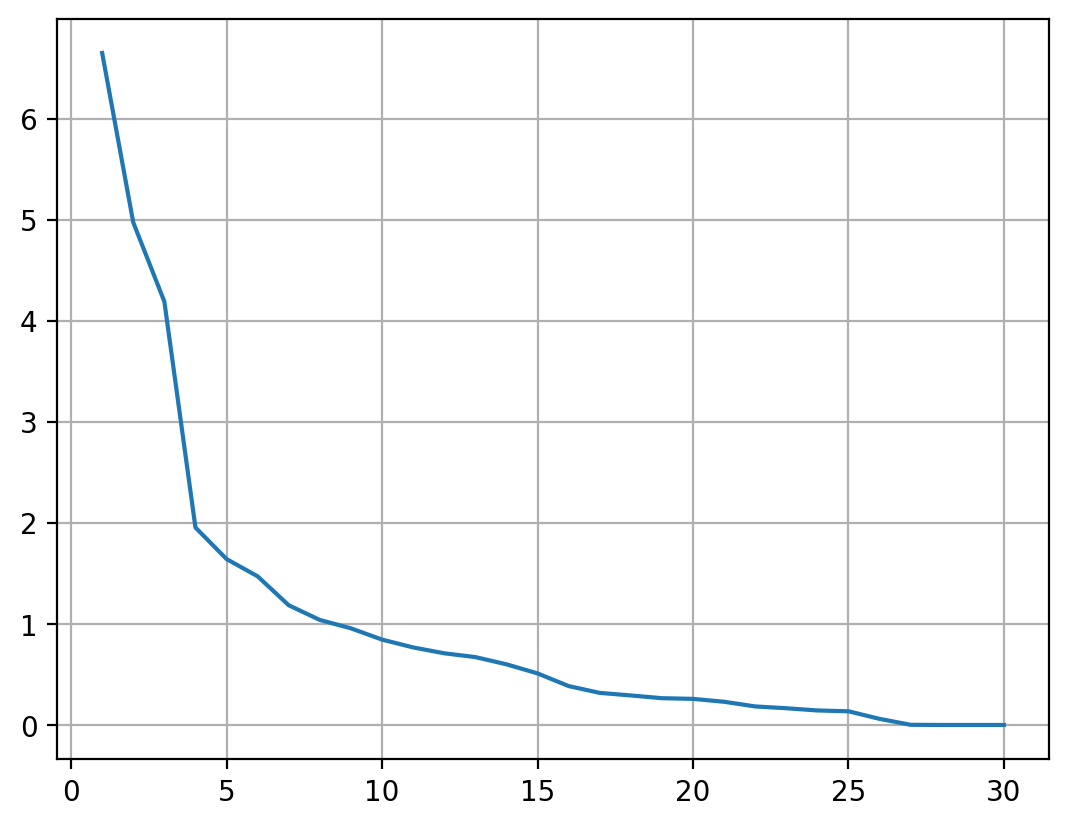

In [31]:
# PCA를 이용해 Dimensionality Reduction 수행
pca = PCA()
pca.fit(X_train)
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.grid()

In [40]:
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [41]:
from lightgbm import LGBMRegressor

In [42]:
model_reg = LGBMRegressor()
model_reg.fit(pca.transform(X_train), y_train)

LGBMRegressor()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [44]:
pred = model_reg.predict(pca.transform(X_test))
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test>0.5, pred>0.5))

0.00763075202013584
0.08735417574527185
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       146
        True       0.71      0.59      0.65        17

    accuracy                           0.93       163
   macro avg       0.83      0.78      0.80       163
weighted avg       0.93      0.93      0.93       163



## unuse PCA

In [45]:
model_reg.fit(X_train, y_train)
pred = model_reg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test>0.5, pred>0.5))

0.005666190303415018
0.07527410114651
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       146
        True       0.80      0.71      0.75        17

    accuracy                           0.95       163
   macro avg       0.88      0.84      0.86       163
weighted avg       0.95      0.95      0.95       163



In [46]:
from xgboost import XGBClassifier

In [48]:
model_cls = XGBClassifier()
model_cls.fit(X_train, y_train>0.5)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

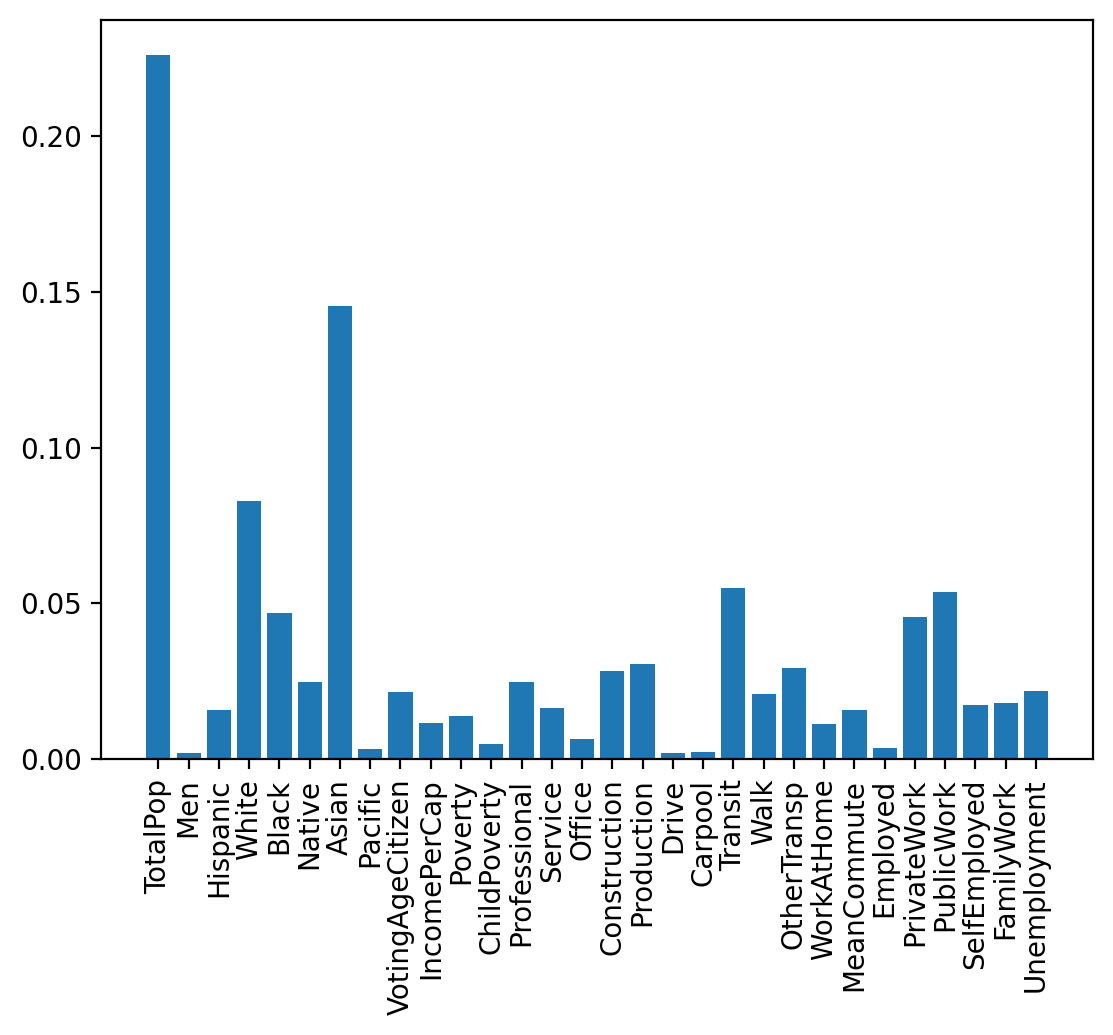

In [50]:
plt.bar(X.columns, model_cls.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [51]:
pred = model_cls.predict(X_test)
print(classification_report(y_test>0.5, pred))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       146
        True       0.73      0.65      0.69        17

    accuracy                           0.94       163
   macro avg       0.85      0.81      0.83       163
weighted avg       0.94      0.94      0.94       163

